# Valley analysis in LSDTopoTools

Wlecome to `plot-valley-analysis`! In order to run this notebook you need to have followed the installation instructions on the `lsdtt-notebooks` GitHub repository and make sure you have `lsdviztools` installed. This notebook plots the results of the LSDTopoTools valley analysis code. It will produce map plots of the valley defined from LSDTT. It also has a number of different options depending on what you're interested in doing. 

If you chose to run the terrace extraction it will make:
* Separate map plots of the floodplain and the terraces

If you chose to measure valley width it will make:
* Plots of the valley width vs distance downstream
* Map plots of the valley width measurements

**NOTE: This is a work in progress!** 

------------------------------------------------------

**If you use this code please cite**: Clubb, F. J., Mudd, S. M., Milodowski, D. T., Valters, D. A., Slater, L. J., Hurst, M. D., and Limaye, A. B.: Geomorphometric delineation of floodplains and terraces from objectively defined topographic thresholds, Earth Surf. Dynam., 5, 369–385, https://doi.org/10.5194/esurf-5-369-2017, 2017.

------------------------------------------------------

## Package imports and declaring variables

Import required packages and define the data directory and DEM name here.

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt

# import some lsdtt modules
# import lsdviztools.lsdbasemaptools as bmt
# from lsdviztools.lsdplottingtools import lsdmap_gdalio as gio
import lsdviztools.lsdmapwrappers as lsdmw
# import lsdttparamselector as ps

Let's define the data directory and the prefix of your DEM

In [13]:
DataDirectory = "/mnt/c/Users/fclub/OneDrive/Documents/GitHub/ExampleTopoDatasets/FloodplainTerraceData/"
Base_file = "Eel_River_DEM"

## Valley plotting

This section makes map plot of the valley. First we'll read in the valley raster and make a plot against the shaded relief:

In [16]:
%matplotlib inline
Drape_prefix = Base_file+"_valley"
valley_img = lsdmw.BinaryDrape(DataDirectory,Base_file, Drape_prefix, cmap = "GnBu_r", alpha=1, save_fig=True)

Your colourbar will be located: None
xsize: 4141 and y size: 5231
NoData is: -9999.0
Yoyoyoyo the EPSG is :EPSG:32610
EPSG:32610
The EPSGString is: EPSG:32610
minimum values are x: 442982.0 and y: 4396552.0
I made the ticks.
x labels are: 
['443', '444', '445', '446', '447']
x locations are:
[443000.0, 444000.0, 445000.0, 446000.0, 447000.0]
y labels are: 
['4397', '4398', '4399', '4400', '4401']
y locations are:
[4397000.0, 4398000.0, 4399000.0, 4400000.0, 4401000.0]
This colourmap is: gray
The number of axes are: 1
Axes(0,0;1x1)
Axes(0,0;1x1)
xsize: 4141 and y size: 5231
NoData is: -9999.0
Yoyoyoyo the EPSG is :EPSG:32610
EPSG:32610
The EPSGString is: EPSG:32610
The number of axes are: 2
The aspect ratio is: 0.7916268399923533
I need to adjust the spacing of the colourbar.
The cbar characters are: 0 and the cbar text width is: 0.4
No colourbar
The figure size is: 
[4.92126, 5.740258647669646]
Map axes are:
[0.1727199944729602, 0.11323531567064116, 0.7866400068275198, 0.85192304873839

<Figure size 432x288 with 0 Axes>

## Valley width

In this section we'll make some plots of the valley width against distance.

In [4]:
# Read in the valley width geojson
widths = gpd.read_file(DataDirectory+Base_file+'_valley_widths.geojson')
widths = widths[widths['total_valley_width'] > 0]

In [5]:
# get the mean valley width
mean_width = widths['total_valley_width'].mean()

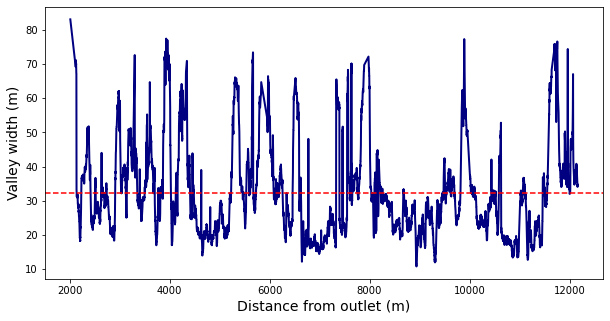

In [6]:
# plot the raw width data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.plot(widths['distance_from_outlet'], widths['total_valley_width'], c='navy', lw=2)
ax.axhline(mean_width, ls='--', c='r')
ax.set_xlabel('Distance from outlet (m)', fontsize=14)
ax.set_ylabel('Valley width (m)', fontsize=14)
plt.show()

In [7]:
# make a plot of the rolling average of widths

In [8]:
reach_length = 100    # set the reach length to average over in metres
widths['rolling_width'] = widths.rolling(reach_length, center=True).mean()['total_valley_width']
widths['rolling_width_std'] = widths.rolling(reach_length, center=True).std()['total_valley_width']

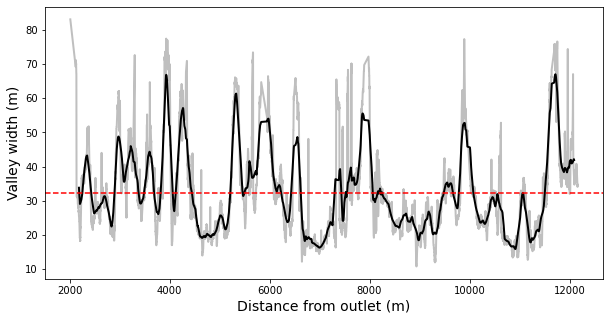

In [9]:
# plot the rolling width data
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
ax.plot(widths['distance_from_outlet'], widths['total_valley_width'], c='0.5', lw=2, alpha=0.5)
ax.plot(widths['distance_from_outlet'], widths['rolling_width'], c='k', lw=2)
ax.axhline(mean_width, ls='--', c='red')
ax.set_xlabel('Distance from outlet (m)', fontsize=14)
ax.set_ylabel('Valley width (m)', fontsize=14)
plt.show()

In [10]:
widths

,latitude,longitude,distance_from_outlet,flow_bearing,left_valley_width,node,orthogonal_bearing,right_valley_width,total_valley_width,geometry,rolling_width,rolling_width_std
0,39.723042,-123.650391,12159.25200,318.170105,15.120500,18234218,48.170105,18.604973,34.713108,"LINESTRING (-123.65039 39.72304, -123.65040 39...",NaN,NaN
1,39.723051,-123.650398,12157.83790,318.170105,15.120500,18230176,48.170105,17.939089,34.058773,"LINESTRING (-123.65040 39.72305, -123.65041 39...",NaN,NaN
2,39.723060,-123.650414,12156.42380,314.999969,15.056349,18226134,44.999969,18.604973,34.655445,"LINESTRING (-123.65041 39.72306, -123.65043 39...",NaN,NaN
3,39.723069,-123.650429,12155.00980,314.999969,15.778820,18222092,44.999969,19.298990,36.069378,"LINESTRING (-123.65043 39.72307, -123.65044 39...",NaN,NaN
4,39.723078,-123.650436,12153.59570,314.999969,15.778820,18218050,44.999969,19.298990,36.069378,"LINESTRING (-123.65044 39.72308, -123.65045 39...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
7486,39.753430,-123.631332,2126.48486,324.217468,10.316654,4654074,54.217468,58.321766,69.634758,"LINESTRING (-123.63133 39.75343, -123.63135 39...",NaN,NaN
7487,39.753439,-123.631348,2125.07056,326.599274,10.316654,4650032,56.599274,58.023499,69.339745,"LINESTRING (-123.63135 39.75344, -123.63135 39...",NaN,NaN
7488,39.753448,-123.631355,2123.65625,329.150360,10.316654,4645990,59.150360,57.809521,69.115845,"LINESTRING (-123.63135 39.75345, -123.63135 39...",NaN,NaN
7577,39.754250,-123.631363,2017.25598,0.000000,35.500000,4286341,90.000000,46.500000,83.000000,"LINESTRING (-123.63136 39.75425, -123.63136 39...",NaN,NaN
